# Summer Olympics Dataset Manipulation

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
medals = pd.read_csv('all_medalists.csv')
medals.head()

City  Edition     Sport Discipline             Athlete  NOC Gender  \
0  Athens     1896  Aquatics   Swimming       HAJOS, Alfred  HUN    Men   
1  Athens     1896  Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men   
2  Athens     1896  Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men   
3  Athens     1896  Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men   
4  Athens     1896  Aquatics   Swimming  CHASAPIS, Spiridon  GRE    Men   

                        Event Event_gender   Medal  
0              100m freestyle            M    Gold  
1              100m freestyle            M  Silver  
2  100m freestyle for sailors            M  Bronze  
3  100m freestyle for sailors            M    Gold  
4  100m freestyle for sailors            M  Silver

### Check USA medals per edition

In [98]:
medals.loc[medals.NOC == 'USA'].groupby('Edition')['Medal'].count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

### Find top countries by total medal count

In [99]:
country_names = medals['NOC']
medal_counts = country_names.value_counts()
medal_counts.head(10)

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
Name: NOC, dtype: int64

### Count medals by type and sort by total medals won

In [100]:
medals_by_type = medals.pivot_table(index='NOC', columns='Medal', values='Athlete', aggfunc='count')
medals_by_type.head()

Medal  Bronze  Gold  Silver
NOC                        
AFG       1.0   NaN     NaN
AHO       NaN   NaN     1.0
ALG       8.0   4.0     2.0
ANZ       5.0  20.0     4.0
ARG      88.0  68.0    83.0

In [101]:
medals_by_type['totals'] = medals_by_type.sum(axis='columns')

In [102]:
medals_by_type = medals_by_type.sort_values('totals', ascending=False)
medals_by_type.head(10)

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0

### Applying .drop_duplicates()

In [103]:
event_gender = medals[['Event_gender', 'Gender']]
no_dup_gender = event_gender.drop_duplicates()
no_dup_gender

Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men

### Finding possible errors with .groupby()

In [104]:
medals_by_gender = medals.groupby(['Event_gender','Gender'])
medals_by_gender.count()

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

### Locating suspicious data

In [105]:
suspicious = (medals.Event_gender == 'W') & (medals.Gender == 'Men')
suspect = medals[suspicious]
suspect

City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze

### Using .nunique() to rank by distinct sports

In [106]:
country_grouped = medals.groupby('NOC')
Nsports = country_grouped['Sport'].nunique()
Nsports = Nsports.sort_values(ascending=False)
Nsports.head()

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
Name: Sport, dtype: int64

### Counting USA vs. USSR Cold War Olympic Sports

In [107]:
during_cold_war = (medals['Edition'] >= 1952) & (medals['Edition'] <= 1988)

In [108]:
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

In [109]:
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

In [110]:
country_grouped = cold_war_medals.groupby('NOC')
number_of_sports = country_grouped['Sport'].nunique()
number_of_sports

NOC
URS    21
USA    20
Name: Sport, dtype: int64

### Checking consistency

In [111]:
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')
medals_won_by_country.head()

NOC      AFG  AHO  ALG   ANZ  ARG  ARM  AUS   AUT  AZE  BAH  ...   URS  URU  \
Edition                                                      ...              
1896     NaN  NaN  NaN   NaN  NaN  NaN  2.0   5.0  NaN  NaN  ...   NaN  NaN   
1900     NaN  NaN  NaN   NaN  NaN  NaN  5.0   6.0  NaN  NaN  ...   NaN  NaN   
1904     NaN  NaN  NaN   NaN  NaN  NaN  NaN   1.0  NaN  NaN  ...   NaN  NaN   
1908     NaN  NaN  NaN  19.0  NaN  NaN  NaN   1.0  NaN  NaN  ...   NaN  NaN   
1912     NaN  NaN  NaN  10.0  NaN  NaN  NaN  14.0  NaN  NaN  ...   NaN  NaN   

NOC        USA  UZB  VEN  VIE  YUG  ZAM  ZIM   ZZX  
Edition                                             
1896      20.0  NaN  NaN  NaN  NaN  NaN  NaN   6.0  
1900      55.0  NaN  NaN  NaN  NaN  NaN  NaN  34.0  
1904     394.0  NaN  NaN  NaN  NaN  NaN  NaN   8.0  
1908      63.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
1912     101.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  

[5 rows x 138 columns]

In [112]:
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]
cold_war_usa_urs_medals

NOC        USA    URS
Edition              
1952     130.0  117.0
1956     118.0  169.0
1960     112.0  169.0
1964     150.0  174.0
1968     149.0  188.0
1972     155.0  211.0
1976     155.0  285.0
1980       NaN  442.0
1984     333.0    NaN
1988     193.0  294.0

In [113]:
most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')
print(most_medals)
most_medals.value_counts()

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object


URS    8
USA    2
dtype: int64

### Getting France medals by year

In [114]:
france = medals.NOC == 'FRA'
france_group = medals[france].groupby(['Edition','Medal'])
france_group['Athlete'].count().head(10)

Edition  Medal 
1896     Bronze     2
         Gold       5
         Silver     4
1900     Bronze    53
         Gold      46
         Silver    86
1908     Bronze    21
         Gold       9
         Silver     5
1912     Bronze     5
Name: Athlete, dtype: int64

In [115]:
france_medals = france_group['Athlete'].count().unstack()
france_medals.head()

Medal    Bronze  Gold  Silver
Edition                      
1896        2.0   5.0     4.0
1900       53.0  46.0    86.0
1908       21.0   9.0     5.0
1912        5.0  10.0    10.0
1920       55.0  13.0    73.0

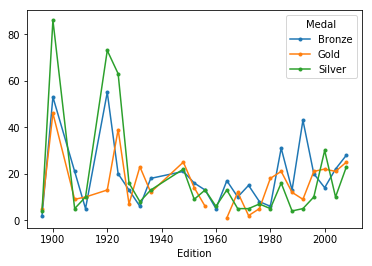

In [116]:
france_medals.plot(kind='line', marker='.')
plt.savefig('france_medals.png')
plt.show()

### Visualizing USA Medal Counts by Edition: Line Plot

In [117]:
usa = medals[medals['NOC']=='USA']
usa_medals_by_year = usa.groupby(['Edition','Medal'])['Athlete'].count()
usa_medals_by_year.head(10)

Edition  Medal 
1896     Bronze      2
         Gold       11
         Silver      7
1900     Bronze     14
         Gold       27
         Silver     14
1904     Bronze    111
         Gold      146
         Silver    137
1908     Bronze     15
Name: Athlete, dtype: int64

In [118]:
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')
usa_medals_by_year.head()

Medal    Bronze  Gold  Silver
Edition                      
1896          2    11       7
1900         14    27      14
1904        111   146     137
1908         15    34      14
1912         31    45      25

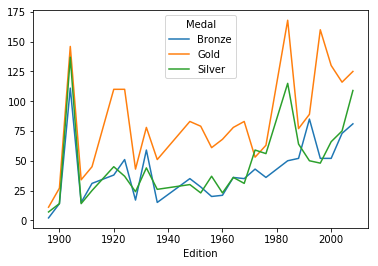

In [120]:
usa_medals_by_year.plot()
plt.savefig('usa_medals.png')
plt.show()

### Visualizing USA Medal Counts by Edition: Area Plot

<function matplotlib.pyplot.show(*args, **kw)>

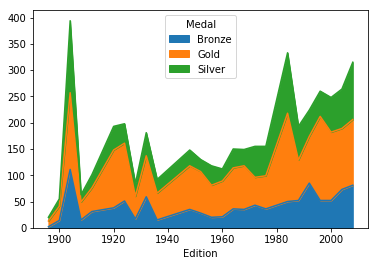

In [123]:
usa_medals_by_year.plot.area()
plt.show

### Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medal

In [122]:
medals.Medal = pd.Categorical(values=medals.Medal, categories=['Bronze','Silver','Gold'], ordered=True)

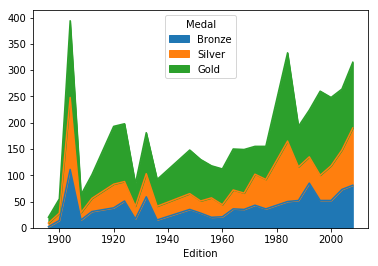

In [124]:
usa = medals[medals.NOC == 'USA']
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')
usa_medals_by_year.plot.area()
plt.savefig('usa_medals_area.png')
plt.show()